# Random Forest

### Colab Setup

In [13]:
import os

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [14]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Final-Project/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['ToDos.md', 'LICENSE', 'XGBoost.ipynb', 'README.md', 'realAccountData.json', 'fakeAccountData.json', 'Unsupervised.ipynb', 'SVM.ipynb', 'DataManip.ipynb', 'LogisticRegression.ipynb', 'NeuralNetwork.ipynb', 'RandomForest.ipynb']


In [15]:
import json

with open(f'{GOOGLE_DRIVE_PATH}realAccountData.json', 'r') as f:
            realData = json.load(f)
with open(f'{GOOGLE_DRIVE_PATH}fakeAccountData.json', 'r') as f:
            fakeData = json.load(f)
allData = realData + fakeData

### Setup

In [16]:
#imports
# load needed libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc, precision_score, recall_score
# Added this to simulate bootstrapped sampeles in the "Manual" Random Forest
from sklearn.utils import resample

# sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

In [17]:
#setting a random seed for reproducibility
import random

random.seed(4)

In [18]:
random.shuffle(allData)

In [19]:
# allData[1] #making sure the combination works

In [20]:
#making sure the data came in correctly
# fakeData[0], realData[0]
# realData[1]

In [21]:
#turning into numpy arrays
numpy_real = np.array(realData)
# print(numpy_real[1]) #making sure things work
numpy_fake = np.array(fakeData)
# print(numpy_fake[1]) #making sure things work
numpy_all = np.array(allData)
# print(numpy_all[1]) #making sure things work

# and making a dataframe
allData_df = pd.DataFrame(allData)


# Random Forest

In [22]:
num_cols = allData_df.shape[1]
X = allData_df.iloc[:,0:num_cols-1] # iloc slicing function
Y = allData_df.iloc[:,num_cols-1:num_cols]
Y = np.ravel(Y)

display(allData_df)

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,65,67,79,116,1,0,0,8,0
1,219,337,0,0,1,1,1,7,0
2,252,509,0,28,1,1,0,11,0
3,58,2132,0,0,0,0,0,14,1
4,452,481,0,82,1,1,0,6,0
...,...,...,...,...,...,...,...,...,...
1189,234,658,93,2,1,0,0,14,0
1190,846,743,22,38,1,0,0,12,0
1191,384,219,51,11,1,1,0,12,0
1192,323,405,0,69,1,1,0,10,0


In [23]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

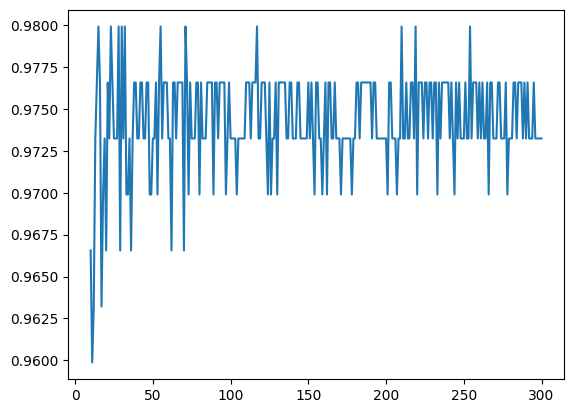

In [24]:
forest_scores = []
for i in range(10, 301):
    random_forest = RandomForestClassifier(n_estimators=i)
    forest_fit = random_forest.fit(x_train, y_train)
    forest_score = forest_fit.score(x_test, y_test)
    forest_scores.append(forest_score)

x =list(range(10, 301))
y = forest_scores

plt.plot(x, y)
plt.show()

In [25]:
final_rf = RandomForestClassifier(random_state=4)
final_rf_fit = final_rf.fit(x_train, y_train)
final_rf_score = final_rf_fit.score(x_test, y_test)
print(final_rf_score)

0.9765886287625418


In [26]:
#function that you will use to convert confusion matrix to dataframe, useful for visulization.
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

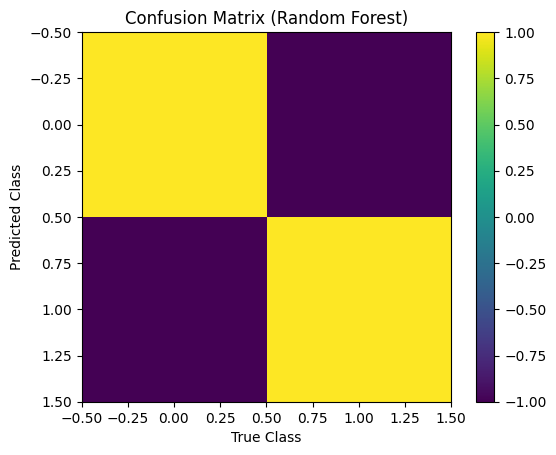

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       246
           1       0.93      0.94      0.93        53

    accuracy                           0.98       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.98      0.98      0.98       299



In [27]:
# Model Results
from sklearn.preprocessing import StandardScaler

y_test_array = np.ravel(y_test)
rf_predicted = final_rf.predict(X = x_test)

conf_matrix = confusion_matrix(y_true = y_test, y_pred = rf_predicted)
conf_matrix_scaler = StandardScaler().fit(conf_matrix)
conf_matrix_scaled = conf_matrix_scaler.transform(conf_matrix)


# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix (Random Forest)')
plt.imshow(conf_matrix_scaled)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

rf_classification_report = classification_report(y_true = y_test, y_pred = rf_predicted)
print(rf_classification_report)

In [28]:
# Classification Report (Manual)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")

specificity: 0.983739837398374
recall: 0.9433962264150944
precision: 0.9259259259259259
accuracy: 0.9765886287625418


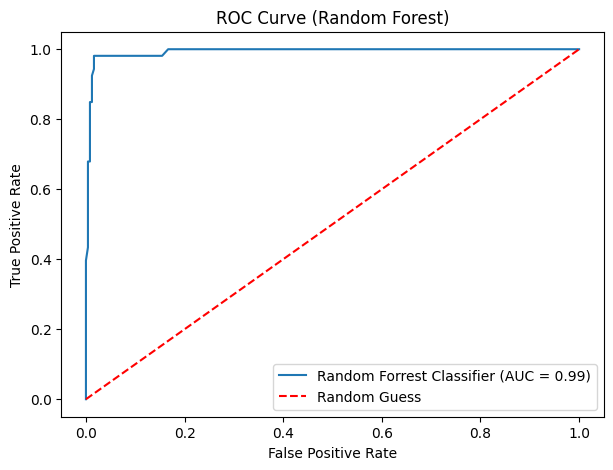

Random Forrest Classifier ROC-AUC: 0.9927136063813469


In [29]:
# ROC Curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
# other option for how things could work
y_score = final_rf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
rf_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Random Forrest Classifier (AUC = {rf_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend()
plt.show()

print(f"Random Forrest Classifier ROC-AUC: {rf_roc_auc}")


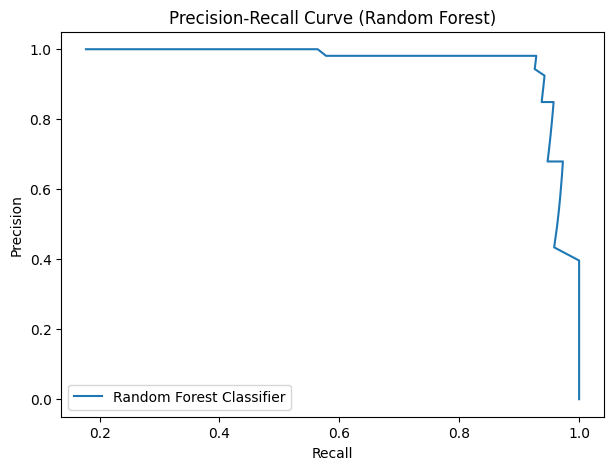

Random Forrest Classifier Precision: 0.9259259259259259
Random Forrest Classifier Recall: 0.9433962264150944


In [30]:
# Precision-Recall Curve
y_score = final_rf.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
rf_precision_score = precision_score(y_test, rf_predicted)
rf_recall_score = recall_score(y_test, rf_predicted)

plt.figure(figsize=(7, 5))
plt.plot(precision, recall, label=f'Random Forest Classifier')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.legend()
plt.show()

print(f"Random Forrest Classifier Precision: {rf_precision_score}")
print(f"Random Forrest Classifier Recall: {rf_recall_score}")
